### Boston Housing dataset Details

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000

- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [1]:
# loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from pandas import set_option
from pandas.plotting import scatter_matrix

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### 1.1 EDA

In [3]:
# loading dataset

df = pd.read_csv('Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# dropping the unnamed column

df = df.drop(columns='Unnamed: 0')
df.head(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [5]:
# analyzing the shape of the data

df.shape

(506, 14)

In [6]:
# Data types of each attributesabs

df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

**Conclusions :Most of the datatypes are real valued (float)**

In [7]:
# dataset description

from pandas import set_option

set_option('precision' , 3)
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000,506.000
mean,3.614,11.364,11.137,0.069,0.555,6.285,68.575,3.795,9.549,408.237,18.456,356.674,12.653,22.533
std,8.602,23.322,6.860,0.254,0.116,0.703,28.149,2.106,8.707,168.537,2.165,91.295,7.141,9.197
min,0.006,0.000,0.460,0.000,0.385,3.561,2.900,1.130,1.000,187.000,12.600,0.320,1.730,5.000
25%,0.082,0.000,5.190,0.000,0.449,5.886,45.025,2.100,4.000,279.000,17.400,375.377,6.950,17.025
50%,0.257,0.000,9.690,0.000,0.538,6.208,77.500,3.207,5.000,330.000,19.050,391.440,11.360,21.200
75%,3.677,12.500,18.100,0.000,0.624,6.623,94.075,5.188,24.000,666.000,20.200,396.225,16.955,25.000
max,88.976,100.000,27.740,1.000,0.871,8.780,100.000,12.127,24.000,711.000,22.000,396.900,37.970,50.000


In [8]:
# checking the correlation between various fetures

set_option('precision' , 2)
df.corr(method = 'pearson')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.00,-0.20,0.41,-5.59e-02,0.42,-0.22,0.35,-0.38,6.26e-01,0.58,0.29,-0.39,0.46,-0.39
zn,-0.20,1.00,-0.53,-4.27e-02,-0.52,0.31,-0.57,0.66,-3.12e-01,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1.00,6.29e-02,0.76,-0.39,0.64,-0.71,5.95e-01,0.72,0.38,-0.36,0.60,-0.48
chas,-0.06,-0.04,0.06,1.00e+00,0.09,0.09,0.09,-0.10,-7.37e-03,-0.04,-0.12,0.05,-0.05,0.18
nox,0.42,-0.52,0.76,9.12e-02,1.00,-0.30,0.73,-0.77,6.11e-01,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,9.13e-02,-0.30,1.00,-0.24,0.21,-2.10e-01,-0.29,-0.36,0.13,-0.61,0.70
age,0.35,-0.57,0.64,8.65e-02,0.73,-0.24,1.00,-0.75,4.56e-01,0.51,0.26,-0.27,0.60,-0.38
dis,-0.38,0.66,-0.71,-9.92e-02,-0.77,0.21,-0.75,1.00,-4.95e-01,-0.53,-0.23,0.29,-0.50,0.25
rad,0.63,-0.31,0.60,-7.37e-03,0.61,-0.21,0.46,-0.49,1.00e+00,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-3.56e-02,0.67,-0.29,0.51,-0.53,9.10e-01,1.00,0.46,-0.44,0.54,-0.47


We can that most of the features share a strong corrrelation between each other 
- i.e values greater than 0.70 (> 0.70) 
-  values less than -0.70 (< -0.70)

- **indus and nox wih corrrelation of 0.76**
- **modev and indus have a corr value = -0.48**
- **nox and indus = 0.76**
- **nox and age 0.73**
etc

- **LSTAT has good negative correlation with output MEDV with a value of -0.74**

In [9]:
# Checking the skewness of the attributes

# Positive skew value = right/positive skew
# negative skew value = left/negative skew

# values closer to 0 show less skew

df.skew()

crim       5.22
zn         2.23
indus      0.30
chas       3.41
nox        0.73
rm         0.40
age       -0.60
dis        1.01
rad        1.00
tax        0.67
ptratio   -0.80
black     -2.89
lstat      0.91
medv       1.11
dtype: float64

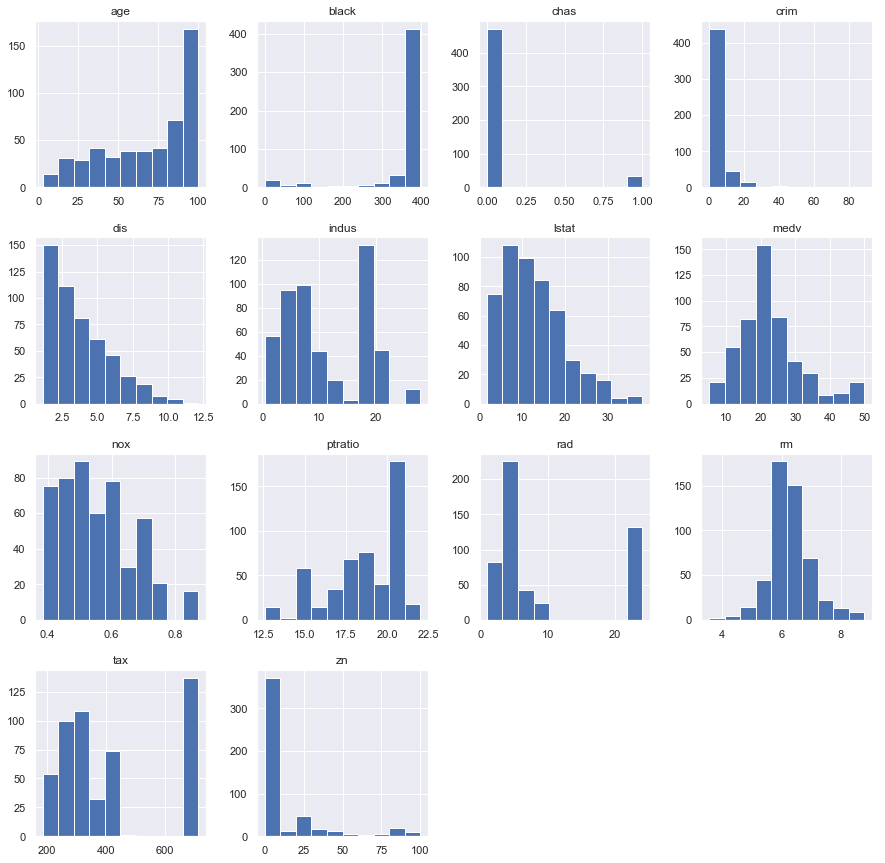

In [10]:
# Data Visualizations

# histograms

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,15)  # increasing the size of histograms by using matplotlib top level settings

df.hist()
plt.show()

**Obeservations : We can see that few of the features have different distribuitions**

- **a) Exponential distributions** 
  - age ,black, crim , zn
- b) log normal distribution
   - dis
- **c) Bimodal distribution**
    - tax and rad            

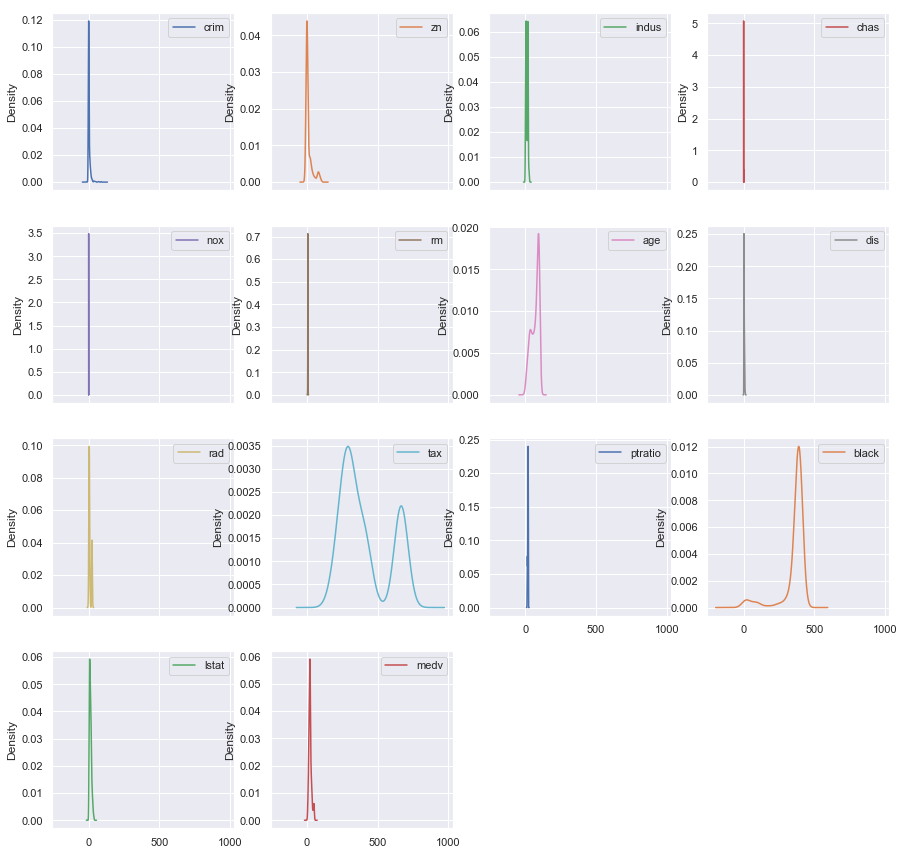

In [11]:
# density plots

# mpl.rcParams['figure.figsize'] = (15,15)

df.plot(kind = 'density' , subplots = True , layout = (4,4));

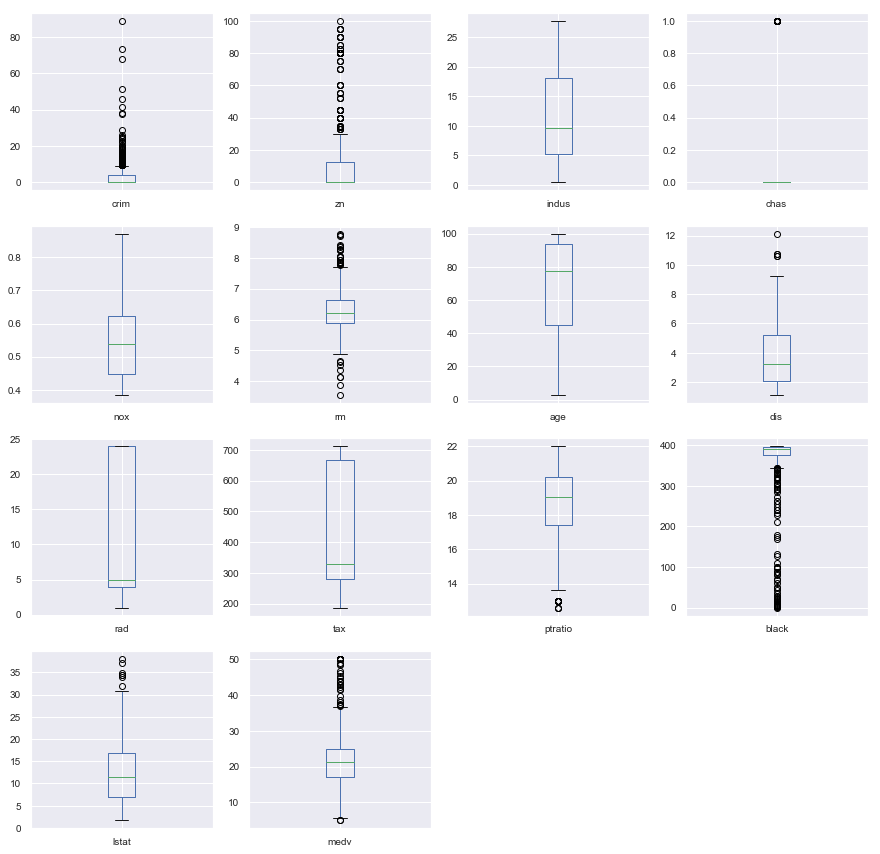

In [11]:
# box and whisker plots

mpl.rcParams['figure.figsize'] = (15,15)
df.plot(kind = 'box' ,subplots=True , layout=(4,4) , fontsize=10);

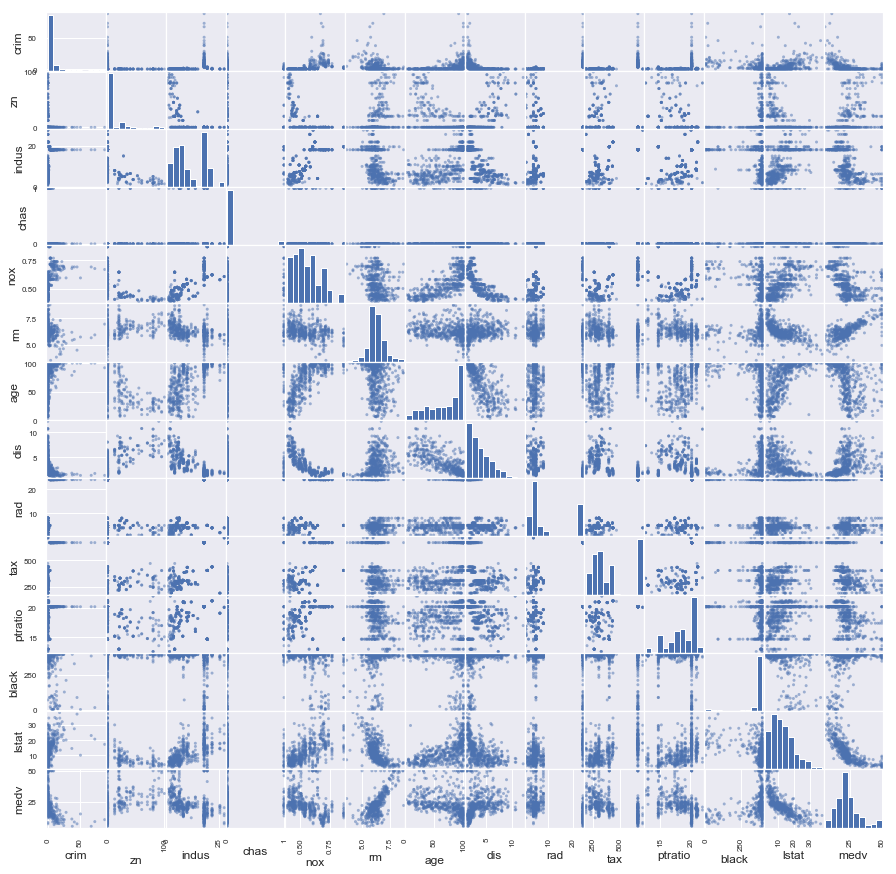

In [12]:
# multimoal data visualization

#scatter plot matrix

scatter_matrix(df)
plt.show()

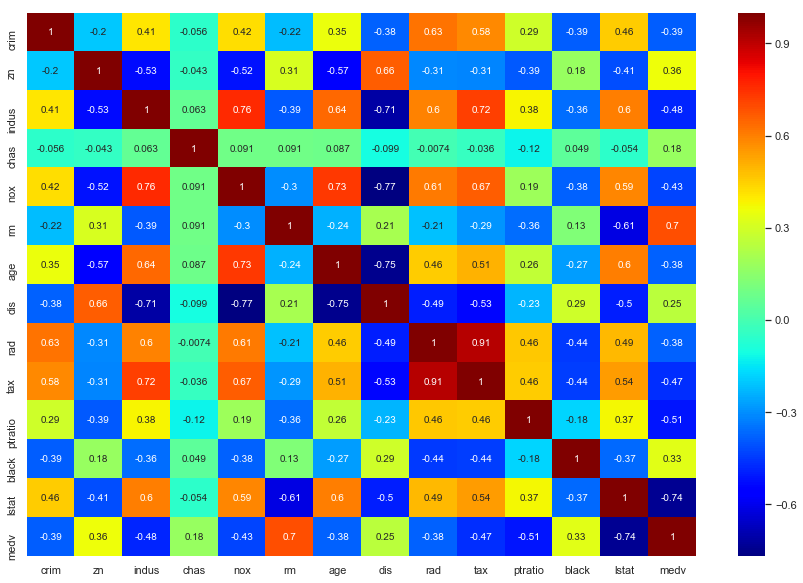

In [12]:
# correlation matrix 

corr =df.corr()
mpl.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data = corr , annot = True , cmap='jet');

**Observations:**

- **Dark red shows positive correlation**
- **Dark blue shows negative correlation**

- We can see some dark red and dark blue in the plot above which sugestes features which can be removed for better accuracy

Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, 
    CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r,
    Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG,
    PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, 
    RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r,
    Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r,
    YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, 
    brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r,
    cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat,
    gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg,
    gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire,
    icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, 
    ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic,
    seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, 
    tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r,
    vlag, vlag_r, winter, winter_r

In [13]:
# Splitting the dataset

X = df.iloc[:, :-1]
y = df.iloc[: , -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

### 2. Evaluating Algorithm baseline

* 6 algoritms which work well with regression
   - **Linear Algorithms** - Linear Regression,LASSO and ElasticNet
   - **Non-linear algorithms** - CART , SVR , KNN

In [14]:
# test options and evaluation metric

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'  # MSE gives us a gross idea of how wrong all predictions are (0 is perfect)

In [15]:
# Spot check algorithms

models = []
models.append(('LR' , LinearRegression()))
models.append(('LASSO' , Lasso()))
models.append(('EN' , ElasticNet()))
models.append(('CART' , DecisionTreeRegressor()))
models.append(('SVR' ,SVR(gamma = 'auto')))
models.append(('KNN' , KNeighborsRegressor()))

In [16]:
# evaluating each model turn

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits= num_folds, random_state= seed)
    cv_results = cross_val_score(model , X_train, y_train , cv =kfold , scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name , cv_results.mean(), cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
CART: -26.135335 (10.320725)
SVR: -85.518342 (31.994798)
KNN: -41.896488 (13.901688)


**Observations**

   - a) LR has the lowest MSE error

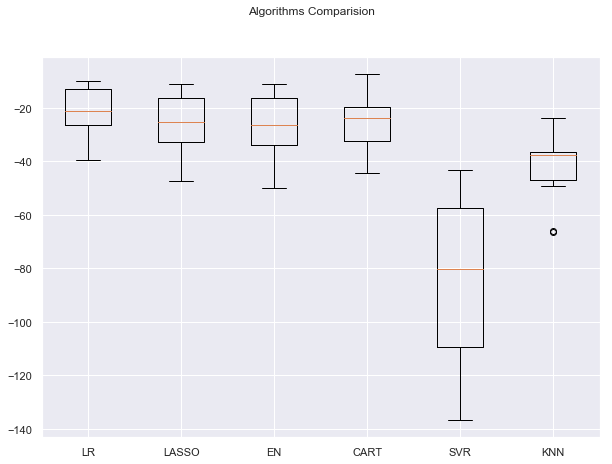

In [17]:
# plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(10,7))
plt.suptitle('Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Observations** 
   - We see similar distributions for regression algorithms and perhaps a tighter distribution of scores for CART

###  3. Data Preparation

**Roadmap**
 
   - 1. Feature selection and removing the most correlated attributes
   - 2. Normalizing the dataset to remove the effect of differeing scales
   - 3. Standardizing the dataset to reduce the effects of differing distributions

In [18]:
# Standardizingthe dataset using pipelines for preventing information leakage

pipelines = []

pipelines.append(('ScaledLR' , Pipeline([('Scaler' , StandardScaler()), ('LR' , LinearRegression())])))
pipelines.append(('ScaledLASSO' , Pipeline([('Scaler' , StandardScaler()), ('LASSO' , Lasso())])))
pipelines.append(('ScaledEN' , Pipeline([('Sacler' ,StandardScaler()) ,('EN' , ElasticNet())])))
pipelines.append(('ScaledCART' , Pipeline([('Scaler' , StandardScaler()) , ('CART' ,DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR' , Pipeline([('Scaler', StandardScaler()) , ('SVR' , SVR(gamma = 'auto'))])))
pipelines.append(('ScaledKNN' ,Pipeline([('Scaler' ,StandardScaler()) , ('KNN' , KNeighborsRegressor())])))

In [19]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [20]:
# Evaluating model

results = []
names = []

for name,model in pipelines:
    kfold = KFold(n_splits = num_folds , random_state= seed)
    cv_results = cross_val_score(model , X_train,y_train ,cv =kfold , scoring= scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name , cv_results.mean() , cv_results.std())
    print(msg)

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledCART: -24.095418 (9.339908)
ScaledSVR: -29.633086 (17.009186)
ScaledKNN: -20.107620 (12.376949)


**Observation: KNN has the tightest distribution of error and lowest MSE score**

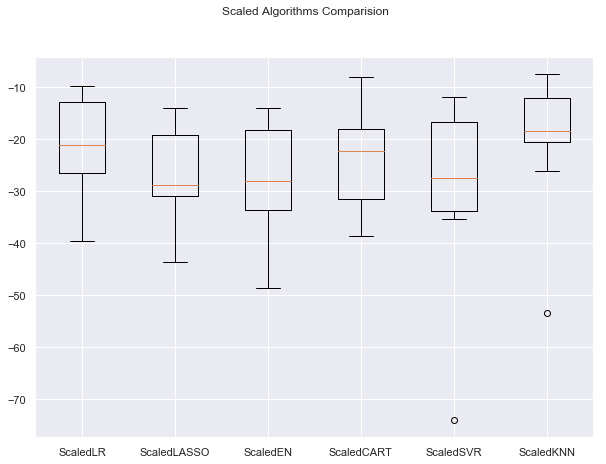

In [21]:
# plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(10,7))
plt.suptitle('Scaled Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 4. Improving Results Of KNN model with  hyper parameter tuning using grid search

In [22]:
# KNN algorithm tuning 
# seed = 7 , num_folds = 10


scaler = StandardScaler().fit(X_train)
scaled_X = scaler.transform(X_train)
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors= k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits= num_folds , random_state= seed)                             
grid = GridSearchCV(estimator= model , param_grid= param_grid , scoring = scoring , cv = kfold)
grid_result = grid.fit(scaled_X , y_train)

In [23]:
# displaying the means and the std.deviation scores as well the best performing k

print('Best score: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print('%f (%f) with : %r' % (mean,stdev,param))

Best score: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with : {'n_neighbors': 1}
-18.172137 (12.950570) with : {'n_neighbors': 3}
-20.131163 (12.203697) with : {'n_neighbors': 5}
-20.575845 (12.345886) with : {'n_neighbors': 7}
-20.368264 (11.621738) with : {'n_neighbors': 9}
-21.009204 (11.610012) with : {'n_neighbors': 11}
-21.151809 (11.943318) with : {'n_neighbors': 13}
-21.557400 (11.536339) with : {'n_neighbors': 15}
-22.789938 (11.566861) with : {'n_neighbors': 17}
-23.871873 (11.340389) with : {'n_neighbors': 19}
-24.361362 (11.914786) with : {'n_neighbors': 21}


**The best k is 3 with a MSE of -18.172**

### 5. Ensemble Methods

We will be evaluating 4 different ensemble ML algorithms - 2 boosting and 2 bagging

   - **Boosting algorithms** - AdaBoost , GradientBoost
   - **Bagging Algorithm** - Random Forest  and Extra trees

In [33]:
# Supressing future warnings
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [35]:
ensembles = []

ensembles.append(('ScaledAB' , Pipeline([('Scaler' , StandardScaler()) , ('AB' , AdaBoostRegressor())])))
ensembles.append(('ScaledGBM' , Pipeline([('Scaler' , StandardScaler()) , ('GBM' , GradientBoostingRegressor())])))
ensembles.append(('ScaledRF' , Pipeline([('Scaler' , StandardScaler()) , ('RF' , RandomForestRegressor())])))
ensembles.append(('ScaledET' , Pipeline([('Scaler' , StandardScaler()) , ('ET' , ExtraTreesRegressor())])))

results = []
names = []

for name,model in ensembles:
    kfold = KFold(n_splits= num_folds , random_state= seed)
    cv_results = cross_val_score(model ,X_train,y_train ,cv = kfold , scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name , cv_results.mean() , cv_results.std())
    print(msg)

ScaledAB: -14.849904 (6.820901)
ScaledGBM: -10.267989 (4.632068)
ScaledRF: -13.115186 (7.016602)
ScaledET: -10.452356 (5.537849)


**Observations**

- Gradient Boosting and Extra Tress have almost the same performance

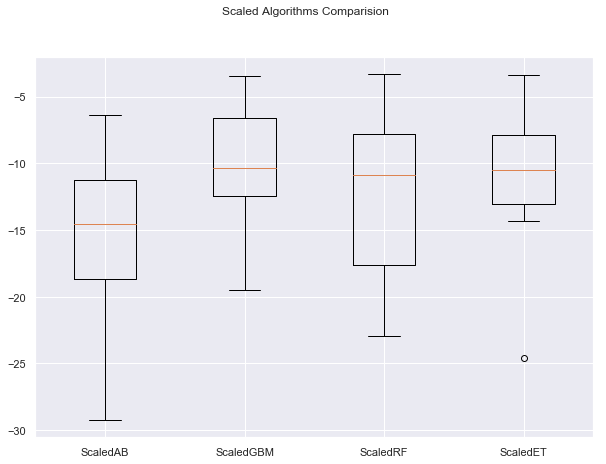

In [31]:
# plotting the distributions of scores of all algorithms

fig = plt.figure(figsize=(10,7))
plt.suptitle('Scaled Algorithms Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

### 6. Tuning Ensemble Methods

**We will be choosing GBM as our final ensemble method**

   - We will be choosing a parameter grid with n_estimators values from 50 to 400 with increments of 50
   - Each setting will be evaluated with a 10 fold cv

In [36]:
# Tune scaled GBM

scaler = StandardScaler().fit(X_train)
scaled_X_GBM = scaler.transform(X_train)
param_grid = dict(n_estimators = np.array([50,100,150,200,250,300,350,400]))

model = GradientBoostingRegressor(random_state = seed)
kfold = KFold(n_splits= num_folds , random_state= seed)
grid = GridSearchCV(estimator= model , param_grid= param_grid, scoring= scoring , cv = kfold)
grid_result = grid.fit(scaled_X_GBM , y_train)

In [39]:
# Summarizing the best configuration and getting an idea of how performance will change with each different configuration

print('Best score: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean,stdev,param in zip(means,stds,params):
    print('%f (%f) with : %r' % (mean,stdev,param))

Best score: -9.353870 using {'n_estimators': 400}
-10.812167 (4.724394) with : {'n_estimators': 50}
-10.040857 (4.441758) with : {'n_estimators': 100}
-9.694045 (4.275653) with : {'n_estimators': 150}
-9.539481 (4.270153) with : {'n_estimators': 200}
-9.449042 (4.261930) with : {'n_estimators': 250}
-9.426909 (4.271399) with : {'n_estimators': 300}
-9.366779 (4.251669) with : {'n_estimators': 350}
-9.353870 (4.265816) with : {'n_estimators': 400}


### 7. Finalizing the model

Here we will finalize the BGM and evaluate in on our test set.
   - First we need to prepare the model and train it on the entire training dataset. This includes standardizing the dataset before training

In [41]:
# preparing the model

scaler = StandardScaler().fit(X_train)
rescaled_X = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state= seed , n_estimators= 400)
model.fit(rescaled_X , y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=400, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
# Scaling the test dataset

rescaled_test_X = scaler.transform(X_test)
y_pred = model.predict(rescaled_test_X)
print(mean_squared_error(y_test , y_pred))


11.878916447820348
